**Name:**Saadullah Khan

**Homework Assignment**
* Load the IMDB review data set. Perform lower casing and stemming, and remove the non-alphabets and stop words.
* Create the **TD matrix** for both the training and testing data.
* Let $n$ and $p$ stand for the number of observations and the number of features, respectively. Print $n$ and $p$.
* Fit a lasso logistic regression model to the training **TD matrix**. Use 10-fold cross validation on the training data to select the optimal hyper-parameter.
* Fit a elastic-net logistic regression model (with `l1_ratio=0.5`) to the training **TD matrix**. Use 10-fold cross validation on the training data to select the optimal hyper-parameter.
* Fit a ridge logistic regression model to the training **TD matrix**. Use 10-fold cross validation on the training data to select the optimal hyper-parameter.
* Create a $1 \times 3$ plot, each panel showing the cross-validation curve as a function of $\lambda$.
* For the each of the models above, with the hyper parameters selected using cross validation, compute the train and test error, and present them in an appropiate $2 \times 3$ table.
* Fit a random forest to the training **TD matrix**. Use `entropy` as the loss, $m=\sqrt{p}$, and $B=300$ number of trees in the forest. Compute the train and test error.
* Fit a multinomial Naive Bayes classifier to the training **TD matrix**. Compute the train and test error.
* Create a $2 \times 5$ table, putting together all the training and testing errors of the models above.
* **Note:** All the error rates above should be reported up to two decimal digits.

In [ ]:
import tensorflow_datasets as tfds
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import re
# Download NLTK data
nltk.download('stopwords')
# Download and Load IMDb dataset
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def preprocess(text):
    text = text.decode('utf-8')  # Decode bytes to string
    #text = re.sub(r'\d+', '', text)  # Remove numerics
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Remove non-letter characters
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Stemming and stop words removal
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saad_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

# Extract X and y from train and test datasets
X_train_list = [preprocess(text.numpy()) for text, _ in train_dataset]
y_train = [label.numpy() for _, label in train_dataset]
X_test_list = [preprocess(text.numpy()) for text, _ in test_dataset]
y_test = [label.numpy() for _, label in test_dataset]
# Print Train and Test sizes
print("Train Sample Size: ", len(X_train_list))
print("Test Sample Size: ", len(X_test_list))
# Vectorization of text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_list)
X_test = vectorizer.transform(X_test_list)
# Compute and Print Type I and Type II errors for train and test data separately.
print("Shape of X_train_vect: ", X_train.shape)
print("Shape of X_test_vect: ", X_test.shape)
# Print Vocabulary Size
print("Vocabulary Size: ", len(vectorizer.vocabulary_))

Train Sample Size:  25000
Test Sample Size:  25000
Shape of X_train_vect:  (25000, 49642)
Shape of X_test_vect:  (25000, 49642)
Vocabulary Size:  49642


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress convergence warnings
warnings.simplefilter('ignore', ConvergenceWarning)
# Define C values for each model
C_values_ridge = np.logspace(-2, 0, num=5, base=10)
C_values_lasso = np.logspace(-1, 1, num=5, base=10)
C_values_elastic = np.logspace(-1, 1, num=5, base=10)
# Define the models with their corresponding C values
models = {
    'Ridge': ('l2', C_values_ridge),
    'Lasso': ('l1', C_values_lasso),
    'ElasticNet': ('elasticnet', C_values_elastic)
}
# Initialize storage for errors, timings, and test errors
model_cv_errors = {name: [] for name in models}
model_train_errors = {name: [] for name in models}
model_test_errors = {name: None for name in models}
model_times = {name: [] for name in models}


Number of observations (n): 25000
Number of features (p): 49642
X_train type: <class 'scipy.sparse._csr.csr_matrix'>
X_train sparsity: 99.81%

CROSS-VALIDATION FOR REGULARIZED LOGISTIC REGRESSION

Ridge Regression:
----------------------------------------
  C=0.0100, λ=100.0000: CV Error=0.1228, Train Error=0.0872
  C=0.0316, λ=31.6228: CV Error=0.1181, Train Error=0.0634
  C=0.1000, λ=10.0000: CV Error=0.1177, Train Error=0.0387
  C=0.3162, λ=3.1623: CV Error=0.1213, Train Error=0.0186
  C=1.0000, λ=1.0000: CV Error=0.1258, Train Error=0.0102

  Best C: 0.1000 (λ=10.0000)
  Best CV Error: 0.1177

Lasso Regression:
----------------------------------------
  C=0.1000, λ=10.0000: CV Error=0.1308, Train Error=0.1098
  C=0.3162, λ=3.1623: CV Error=0.1234, Train Error=0.0905
  C=1.0000, λ=1.0000: CV Error=0.1210, Train Error=0.0797
  C=3.1623, λ=0.3162: CV Error=0.1197, Train Error=0.0751
  C=10.0000, λ=0.1000: CV Error=0.1189, Train Error=0.0729

  Best C: 10.0000 (λ=0.1000)
  Best CV Err

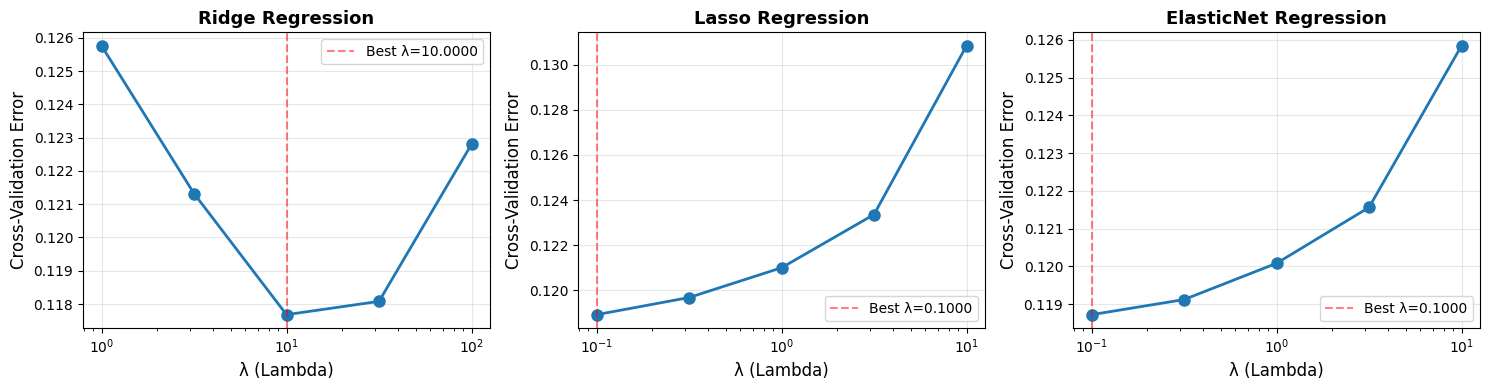

Cross-validation curves saved as 'cv_curves.png'

COMPUTING TRAIN AND TEST ERRORS FOR OPTIMAL MODELS

Ridge Regression (C=0.1000):
  Train Error: 0.0387 (3.87%)
  Test Error:  0.1281 (12.81%)

Lasso Regression (C=10.0000):
  Train Error: 0.0729 (7.29%)
  Test Error:  0.1238 (12.38%)

ElasticNet Regression (C=10.0000):
  Train Error: 0.0726 (7.26%)
  Test Error:  0.1238 (12.38%)

REGULARIZATION MODELS: TRAIN AND TEST ERRORS

            Train Error  Test Error
Ridge            0.0387      0.1281
Lasso            0.0729      0.1238
ElasticNet       0.0726      0.1238

RANDOM FOREST CLASSIFIER

Number of features to consider at each split (m): 222
Number of trees (B): 300

Training Random Forest...
Training completed in 31.33 seconds

Train Error: 0.0000 (0.00%)
Test Error:  0.1378 (13.78%)

MULTINOMIAL NAIVE BAYES CLASSIFIER

Training Naive Bayes...
Training completed in 0.02 seconds

Train Error: 0.1006 (10.06%)
Test Error:  0.1814 (18.14%)

COMPREHENSIVE RESULTS: ALL MODELS

          

In [ ]:
# Print n and p (X_train is already sparse from CountVectorizer)
n, p = X_train.shape
print(f"\nNumber of observations (n): {n}")
print(f"Number of features (p): {p}")
print(f"X_train type: {type(X_train)}")
print(f"X_train sparsity: {(1 - X_train.nnz / (n * p)) * 100:.2f}%")
# Perform cross-validation for each regularization model
print("\n" + "="*80)
print("CROSS-VALIDATION FOR REGULARIZED LOGISTIC REGRESSION")
print("="*80)
best_params = {}
for model_name, (penalty, C_values) in models.items():
    print(f"\n{model_name} Regression:")
    print("-" * 40)
    
    cv_scores_list = []
    train_scores_list = []
    
    for C in C_values:
        if penalty == 'elasticnet':
            model = LogisticRegression(
                penalty=penalty, 
                C=C, 
                solver='saga', 
                l1_ratio=0.5,
                max_iter=100,
                random_state=42
            )
        else:
            solver = 'saga' if penalty == 'l1' else 'lbfgs'
            model = LogisticRegression(
                penalty=penalty, 
                C=C, 
                solver=solver,
                max_iter=100,
                random_state=42
            )
        
        # 10-fold cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
        cv_accuracy = cv_scores.mean()
        cv_error = 1 - cv_accuracy
        
        # Train on full training set to get train error
        model.fit(X_train, y_train)
        train_accuracy = model.score(X_train, y_train)
        train_error = 1 - train_accuracy
        
        cv_scores_list.append(cv_error)
        train_scores_list.append(train_error)
        model_cv_errors[model_name].append(cv_error)
        model_train_errors[model_name].append(train_error)
        
        print(f"  C={C:.4f}, λ={1/C:.4f}: CV Error={cv_error:.4f}, Train Error={train_error:.4f}")
    
    # Find best C (minimum CV error)
    best_idx = np.argmin(cv_scores_list)
    best_C = C_values[best_idx]
    best_params[model_name] = best_C
    
    print(f"\n  Best C: {best_C:.4f} (λ={1/best_C:.4f})")
    print(f"  Best CV Error: {cv_scores_list[best_idx]:.4f}")

# Plot cross-validation curves
print("\n" + "="*80)
print("GENERATING CROSS-VALIDATION CURVES")
print("="*80)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, (model_name, (penalty, C_values)) in enumerate(models.items()):
    lambda_values = 1 / C_values
    cv_errors = model_cv_errors[model_name]
    
    axes[idx].plot(lambda_values, cv_errors, marker='o', linewidth=2, markersize=8)
    axes[idx].set_xlabel('λ (Lambda)', fontsize=12)
    axes[idx].set_ylabel('Cross-Validation Error', fontsize=12)
    axes[idx].set_title(f'{model_name} Regression', fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xscale('log')
    
    # Mark the best lambda
    best_C = best_params[model_name]
    best_lambda = 1 / best_C
    best_error = min(cv_errors)
    axes[idx].axvline(x=best_lambda, color='r', linestyle='--', alpha=0.5, label=f'Best λ={best_lambda:.4f}')
    axes[idx].legend()
plt.tight_layout()
plt.savefig('cv_curves.png', dpi=300, bbox_inches='tight')
plt.show()
print("Cross-validation curves saved as 'cv_curves.png'")
# Compute train and test errors for optimal models
print("\n" + "="*80)
print("COMPUTING TRAIN AND TEST ERRORS FOR OPTIMAL MODELS")
print("="*80)
regularization_results = {}
for model_name, (penalty, C_values) in models.items():
    best_C = best_params[model_name]
    
    print(f"\n{model_name} Regression (C={best_C:.4f}):")
    
    # Fit model with best C
    if penalty == 'elasticnet':
        model = LogisticRegression(
            penalty=penalty, 
            C=best_C, 
            solver='saga', 
            l1_ratio=0.5,
            max_iter=100,
            random_state=42
        )
    else:
        solver = 'saga' if penalty == 'l1' else 'lbfgs'
        model = LogisticRegression(
            penalty=penalty, 
            C=best_C, 
            solver=solver,
            max_iter=100,
            random_state=42
        )
    
    model.fit(X_train, y_train)

    # Compute errors
    train_accuracy = model.score(X_train, y_train)
    train_error = 1 - train_accuracy
    
    test_accuracy = model.score(X_test, y_test)
    test_error = 1 - test_accuracy
    
    regularization_results[model_name] = {
        'train_error': train_error,
        'test_error': test_error
    }
    
    print(f"  Train Error: {train_error:.4f} ({train_error*100:.2f}%)")
    print(f"  Test Error:  {test_error:.4f} ({test_error*100:.2f}%)")
# Create 2x3 table for regularization models
print("\n" + "="*80)
print("REGULARIZATION MODELS: TRAIN AND TEST ERRORS")
print("="*80)
reg_df = pd.DataFrame(regularization_results).T
reg_df.columns = ['Train Error', 'Test Error']
reg_df = reg_df.round(4)
print("\n" + reg_df.to_string())
# Random Forest
print("\n" + "="*80)
print("RANDOM FOREST CLASSIFIER")
print("="*80)
from sklearn.ensemble import RandomForestClassifier
# m = sqrt(p)
m = int(np.sqrt(p))
print(f"\nNumber of features to consider at each split (m): {m}")
print(f"Number of trees (B): 300")
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_features=m,
    criterion='entropy',
    random_state=42,
    n_jobs=-1
)
print("\nTraining Random Forest...")
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time
print(f"Training completed in {rf_train_time:.2f} seconds")
# Compute errors
rf_train_accuracy = rf_model.score(X_train, y_train)
rf_train_error = 1 - rf_train_accuracy
rf_test_accuracy = rf_model.score(X_test, y_test)
rf_test_error = 1 - rf_test_accuracy
print(f"\nTrain Error: {rf_train_error:.4f} ({rf_train_error*100:.2f}%)")
print(f"Test Error:  {rf_test_error:.4f} ({rf_test_error*100:.2f}%)")
# Multinomial Naive Bayes
print("\n" + "="*80)
print("MULTINOMIAL NAIVE BAYES CLASSIFIER")
print("="*80)
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
print("\nTraining Naive Bayes...")
start_time = time.time()
nb_model.fit(X_train, y_train)
nb_train_time = time.time() - start_time
print(f"Training completed in {nb_train_time:.2f} seconds")
# Compute errors
nb_train_accuracy = nb_model.score(X_train, y_train)
nb_train_error = 1 - nb_train_accuracy
nb_test_accuracy = nb_model.score(X_test, y_test)
nb_test_error = 1 - nb_test_accuracy
print(f"\nTrain Error: {nb_train_error:.4f} ({nb_train_error*100:.2f}%)")
print(f"Test Error:  {nb_test_error:.4f} ({nb_test_error*100:.2f}%)")
# Create comprehensive 2x5 table
print("\n" + "="*80)
print("COMPREHENSIVE RESULTS: ALL MODELS")
print("="*80)
all_results = {
    'Lasso': {
        'Train Error': regularization_results['Lasso']['train_error'],
        'Test Error': regularization_results['Lasso']['test_error']
    },
    'Elastic Net': {
        'Train Error': regularization_results['ElasticNet']['train_error'],
        'Test Error': regularization_results['ElasticNet']['test_error']
    },
    'Ridge': {
        'Train Error': regularization_results['Ridge']['train_error'],
        'Test Error': regularization_results['Ridge']['test_error']
    },
    'Random Forest': {
        'Train Error': rf_train_error,
        'Test Error': rf_test_error
    },
    'Naive Bayes': {
        'Train Error': nb_train_error,
        'Test Error': nb_test_error
    }
}

results_df = pd.DataFrame(all_results).T
results_df.columns = ['Train Error', 'Test Error']
# Round to 2 decimal places as requested
results_df = results_df.round(2)
print("\n" + results_df.to_string())
# Save results to CSV
results_df.to_csv('model_comparison.csv')
print("\n\nResults saved to 'model_comparison.csv'")
# Summary statistics
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
best_test_model = results_df['Test Error'].idxmin()
best_test_error = results_df['Test Error'].min()
print(f"\nBest performing model on test data: {best_test_model}")
print(f"Test Error: {best_test_error:.2f}")
# Check for overfitting
print("\n" + "-"*80)
print("Overfitting Analysis (Train Error - Test Error):")
print("-"*80)
overfit_df = results_df.copy()
overfit_df['Overfit Gap'] = (overfit_df['Test Error'] - overfit_df['Train Error']).round(2)
print(overfit_df[['Train Error', 'Test Error', 'Overfit Gap']].to_string())
print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)